# Problema del 8 puzzle. Representación en el espacio de estados

En esta práctica vamos a resolver el problema del 8 puzzle. El problema del 8 puzzle es una simplificación del juego del **taken**. En una caja con 9 casillas disponemos de 8 fichas y tenemos que moverlas aprovechando la casilla vacia hasta conseguir la disposición final. 
![8 puzzle](puzzle8b.jpg)
Vamos a representar el juego en el espacio de estados y utilizar el algoritmo de búsqueda en anchura para que un agente inteligente obtenga la secuencia de movimientos para colocar las fichas en la posición final partiendo desde cualquier posición inicial.

### Definición del estado

Primero define el estado y como lo vas a representar en Python. Crea dos estados, el estado inicial y el estado final:

In [1]:
estado_final = [0,1,2,3,4,5,6,7,8]
estado_inicial = [8,0,6,5,4,3,2,1]

Como vamos a resolver el problema mediante un árbol de búsqueda utilizaremos una clase muy sencilla para crear objetos nodo. Tienen únicamente dos atributos, el estado, tal y como lo has definido y una lista que se llama camino en la que guardaremos las acciones que el agente va aplicando al estado.

In [2]:
class nodo:
    def __init__(self, estado, camino):
        self.estado = estado
        self.camino = camino

Crea un nodo con el estado inicial:

In [3]:
inicial = nodo([8,0,6,5,4,3,2,1],[0,0,0,0])
print(inicial.estado)

[8, 0, 6, 5, 4, 3, 2, 1]


Para comprobar si el estado de un nodo es el estado final del tablero, tienes que crear una función que tenga como parámetro un **nodo** y devuelva **True** si el estado del nodo es igual al **estado final** o **False** en caso contrario.

In [4]:
def esfinal(nodo):
    final = [1,2,3,4,5,6,7,8,0]
    for i in range(len(nodo.estado)):
        if nodo.estado[i] !=  final[i]:
            return False
    return True

En la respresentación en el espacio de estados las acciones son el conjunto de operaciones que se pueden llevar a cabo para cambiar el estado del problema. Define una serie de funciones, una por cada acción. Todas las funciones deben tener como parámetro de entrada un nodo y deben devolver otro nodo con el estado modificado. Crea todas las funciones extra que te resulten de ayuda para las funciones de las acciones.
Como Python copia los objetos por referencia, utiliza la función deepcopy para crear una copia del nodo y modificar el estado del nuevo nodo.
En todas las acciones añade `nuevonodo.camino.append(accion)`. Esta sentencia nos sirve para almacenar la acción que acabamos de aplicar al estado en la lista camino del nodo y nos servirá pasar saber qué acciones se han aplicado al estado final para llegar hasta el estado del nodo.

In [5]:
#Ejemplo básico de acción
import copy
def moverArriba(nodo):
    nuevonodo = copy.deepcopy(nodo)
    accion = [1, 0, 0, 0]
    nuevonodo.camino.append(accion)
    
    for i in range(len(nuevonodo.estado)): ##guardas en la i la posición del 0
        if nuevonodo.estado[i] == 0:
            break
    aux = nuevonodo.estado[i-3]
    nuevonodo.estado[i-3] = nuevonodo.estado[i]
    nuevonodo.estado[i] = aux
    
    return nuevonodo
    
def moverAbajo(nodo):
    nuevonodo = copy.deepcopy(nodo)
    accion = [0, 1, 0, 0]
    nuevonodo.camino.append(accion)
    
    for i in range(len(nuevonodo.estado)): ##guardas en la i la posición del 0
        if nuevonodo.estado[i] == 0:
            break
    aux = nuevonodo.estado[i+3]
    nuevonodo.estado[i+3] = nuevonodo.estado[i]
    nuevonodo.estado[i] = aux
    
    return nuevonodo
    
def moverDerecha(nodo):
    nuevonodo = copy.deepcopy(nodo)
    accion = [0, 0, 0, 1]
    nuevonodo.camino.append(accion)
    
    for i in range(len(nuevonodo.estado)): ##guardas en la i la posición del 0
        if nuevonodo.estado[i] == 0:
            break
    aux = nuevonodo.estado[i+1]
    nuevonodo.estado[i+1] = nuevonodo.estado[i]
    nuevonodo.estado[i] = aux
    
    return nuevonodo
    
def moverIzquierda(nodo):
    nuevonodo = copy.deepcopy(nodo)
    accion = [0, 0, 1, 0]
    nuevonodo.camino.append(accion)
    
    for i in range(len(nuevonodo.estado)): ##guardas en la i la posición del 0
        if nuevonodo.estado[i] == 0:
            break
    aux = nuevonodo.estado[i-1]
    nuevonodo.estado[i-1] = nuevonodo.estado[i]
    nuevonodo.estado[i] = aux
    
    return nuevonodo
    

def mostrarMatriz(nodo):
    for i in range(0,len(inicial.estado),3):
        for j in range(i, i+3, 1):
            print(nodo.estado[j],end=" ")
            print(' ',end=" ")
        print()
    
inicial = nodo([3,1,2,5,0,4,6,7,8],[0,0,0,0])
mostrarMatriz(inicial)
print()
inicial=moverDerecha(inicial)
mostrarMatriz(inicial)
    
        
        
        
            
    

3   1   2   
5   0   4   
6   7   8   

3   1   2   
5   4   0   
6   7   8   


##### Programación funcional. 
En Python las **funciones** pueden ser **parámetros de otras funciones**, podemos generar **listas de funciones** o una **variable puede ser una función**. Estas características son muy útiles para la programación de problemas utilizando la representación en el espacios de estados. Vamos a ver un ejemplo: en las siguientes celdas están definidas dos funciones muy sencillas. 

In [6]:
def miSuma(numero):
    val = numero + numero*2
    return val

In [7]:
def miResta(numero):
    val = numero - numero**(-1/2)
    return val

En la siguiente celda asignamos la función a una variable. Ten en cuenta que no estamos tratando el nombre de la función como una cadena de texto.

In [8]:
valor = 2
mifuncion = miResta
if mifuncion == miResta:
    print('El resultado de la funcion miResta es:', mifuncion(valor))

El resultado de la funcion miResta es: 1.2928932188134525


Podemos crear una lista que tenga una serie de funciones y llamar a esas funciones en orden:

In [9]:
listafunc = [miSuma, miResta, miSuma, miResta]
valor = 2
for func in listafunc:
    valor = func(valor)
print('El valor final después de aplicar todas las funciones: ', valor)

El valor final después de aplicar todas las funciones:  16.531100235140524


También podemos crear funciones que tengan como parámetro de entrada una función. La siguiente función se encarga de aplicar una función al valor que asignemos al segundo parámetro:

In [10]:
def aplicafunc(funcion, valor):
    val = func(valor)
    return val

print('Valor de la funcion miResta aplicado a 3:', aplicafunc(miResta, 3))

Valor de la funcion miResta aplicado a 3: 2.4226497308103743


Vamos a utilizar estas características de Python para programar la forma de **aplicar las acciones a los estados**. De esta forma podremos tener una lista de acciones (lista con los nombres de las funciones que has definido como acciones)  y las podremos **aplicar a un nodo para generar sus sucesores**. Para esto, primero define una función aplica, en la que tenga como parámatros una acción y un nodo y aplique esa acción al nodo. Tiene que devolver un nuevo nodo:

In [11]:
def aplica(accion, nodo):
    if accion[0] == 1:
        sucesor = moverArriba(nodo)
    elif accion[1] == 1:
        sucesor = moverAbajo(nodo)
    elif accion[2] == 1:
        sucesor = moverIzquierda(nodo)
    else:
        sucesor = moverDerecha(nodo)
    return sucesor

Normalmente, todas las acciones no se pueden aplicar a todos los estados. Crea una función `esposible(accion, nodo)` que tenga como parámetros de entrada un nodo y una acción y devuelva **True** si la acción se puede aplicar en ese estado o **False** si no se puede aplicar. 

In [12]:
def esposible(accion, nodo):
    if nodo.estado[0] == 0 and (accion[3] == 1 or accion[1] == 1):
        return True
    elif nodo.estado[1] == 0 and (accion[0] == 0):
        return True
    elif nodo.estado[2] == 0 and (accion[2] == 1 or accion[1] == 1):
        return True
    elif nodo.estado[3] == 0 and (accion[2] == 0):
        return True
    elif nodo.estado[4] == 0:
        return True
    elif nodo.estado[5] == 0 and accion[3] == 0:
        return True
    elif nodo.estado[6] == 0 and accion[1] == 0 and accion[2] == 0:
        return True
    elif nodo.estado[7] == 0 and accion[1] == 0:
        return True
    elif nodo.estado[8] == 0 and accion[1] == 0 and accion[3] == 0:
        return True
    else:
        return False
    
inicial = nodo([3,1,2,5,0,4,6,7,8],[0,0,0,0])
mostrarMatriz(inicial)
print()
if esposible([0,0,0,1],inicial):
    inicial = aplica([0,0,0,1],inicial)
    mostrarMatriz(inicial)

        

3   1   2   
5   0   4   
6   7   8   

3   1   2   
5   4   0   
6   7   8   


Crea un nodo con el siguiente estado inicial y crea una lista con las cuatro acciones que hay realizar para llegar al estado final:

|0 4 2| -->  |0 1 2| 

|1 3 5| -->|3 4 5|

|6 7 8| --> |6 7 8|

Utiliza la función esposible y la función aplica para ir generando los nodos sucesores y finalmente comprueba con la función esfinal(nodo) si el estado del último nodo es el estado final.

In [13]:
nodoinicial= nodo([0,4,2,1,3,5,6,7,8], [0,0,0,0])
listaacciones=[[0,1,0,0],[0,0,0,1],[1,0,0,0],[0,0,1,0]]
mostrarMatriz(nodoinicial)
print()
for act in listaacciones:
    if esposible (act,nodoinicial):
        nodoinicial=aplica(act,nodoinicial)
    if esfinal(nodoinicial):
        print('Es final')
        break
mostrarMatriz(nodoinicial)


0   4   2   
1   3   5   
6   7   8   

0   1   2   
3   4   5   
6   7   8   


## Búsqueda en anchura
Con todas estas funciones es hora de programar la búsqueda en anchura siguiendo el pseudocódigo de los apuntes. El primer nodo que encuentre que contenga el estado final será la **solución óptima**, es decir el camino tendrá el número mínimo de acciones para pasar del estado incial hasta el estado final.  

Antes de crear el bucle iterativo tienes que crear una función para evitar bucles y no introducir nodos en la lista de abiertos que con estados que ya estan en abiertos o en cerrados. Crea una función que tenga como parametros una lista de nodos y un nodo y devuelva **True** si existe un nodo con el mismo estado en la lista o **False** en caso contrario.

In [14]:
def estaen(lista, nodo):     
    for n in lista:
        if n.estado == nodo.estado:
            return True       
    return False

abiertos=[]
ej1 = nodo([1,1,1,1,1,1,1,1,1],[0,0,0,0])
ej2 = nodo ([2,2,2,2,2,2,2,2,2],[0,0,0,0])
abiertos.append(ej1)
abiertos.append(ej2)
inicial = nodo ([2,2,2,2,2,2,2,2,2],[0,0,0,0])
if estaen(abiertos,inicial):
    print('Esta en abiertos')
else:
    print('No está en abiertos')

Esta en abiertos


Ahora ya dispones de todas las funciones necesarias para programa la búsqueda en anchura.
Para comprobar en la práctica la complejidad del algoritmo vamos a comprobar el tiempo que tarda en ejecutarse y la memoria total que necesita.

In [15]:
from collections import deque
from IPython.display import display, clear_output
import time

start_time = time.time()
nodoinicial = nodo([1,2,3,4,5,6,7,0,8], [])
mostrarMatriz(nodoinicial)
accion1 = [1,0,0,0]
accion2 = [0,1,0,0]
accion3 = [0,0,1,0]
accion4 = [0,0,0,1]
listaacciones = [accion1, accion2, accion3, accion4]
abiertos = []
abiertos.append(nodoinicial)
cerrados=[]
sucesores=[]
nuevossucesores=[]
while len(abiertos) > 0:
    actual = abiertos[0]
    del abiertos[0]
    cerrados.append(actual)
    if esfinal(actual):
        break
    else:
        sucesores.clear()
        nuevossucesores.clear()
        
        for act in listaacciones:
            if esposible(act,actual):
                sucesores.append(aplica(act,actual))
        for i in range(len(sucesores)):
            if estaen(abiertos,sucesores[i]) == False and estaen(cerrados,sucesores[i]) == False:
                nuevossucesores.append(sucesores[i])
        abiertos += (nuevossucesores) 
    print()
    mostrarMatriz(actual)##muestras todos los nodos que coges con abiertos[0] hasta que llegas al estado final
if len(abiertos) == 0:
    print('No solucion')
else:
    print()
    mostrarMatriz(actual)
    print()
    print(actual.camino) ##mostrar las acciones que aplicas pa pasar del estado inicial al final

seconds = time.time() - start_time
print(seconds)
print('Tiempo total:', time.strftime("%H:%M:%S",time.gmtime(seconds)))

1   2   3   
4   5   6   
7   0   8   

1   2   3   
4   5   6   
7   0   8   

1   2   3   
4   0   6   
7   5   8   

1   2   3   
4   5   6   
0   7   8   

1   2   3   
4   5   6   
7   8   0   

[[0, 0, 0, 1]]
0.000637054443359375
Tiempo total: 00:00:00


**Extra**. Vemos que la búsqueda en anchura tarda bastante tiempo en encontrar la soluciónm cuando hacen falta más 10-12 movimientos. Esto es debido, por una parte por la complejidad propia del algoritmo y por que no lo hemos programado bien del todo. Cuando buscamos si un nodo está en la lista de abiertos y en la lista de cerrados, se recorre toda la lista, por lo que tiene una complejidad O(n). Podemos acelerar el algoritmo si esa búsqueda la realizamos en O(log(n)). Para esto podemos hacer que la lista de abiertos y cerrados sean diccionarios. De esta forma la búsqueda de elementos será mucho más rápida. Tendrás que crear un código para cada estado para que sea la clave (debe ser único por cada estado). La lista de abiertos y cerrados pasan a ser diccionarios en los que guardamos los nodos. La clave será el código identificativo y el valor será el nodo. Si lo necesitas puedes añadir otros atributos a la clase nodo como la profundidad.

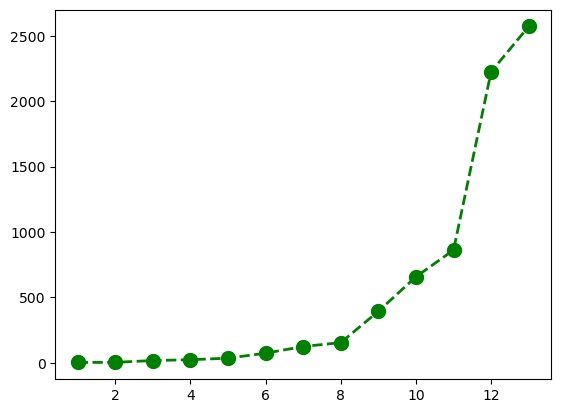

In [18]:
def algoritmoAnchura (nodoinicial):
    start_time = time.time()
    accion1 = [1,0,0,0]
    accion2 = [0,1,0,0]
    accion3 = [0,0,1,0]
    accion4 = [0,0,0,1]
    listaacciones = [accion1, accion2, accion3, accion4]
    abiertos = []
    abiertos.append(nodoinicial)
    cerrados=[]
    sucesores=[]
    nuevossucesores=[]
    contador = 0
    while len(abiertos) > 0:
        actual = abiertos[0]
        del abiertos[0]
        cerrados.append(actual)
        contador = contador + 1
        if esfinal(actual):
            seconds = time.time() - start_time
            return contador
        else:
            sucesores.clear()
            nuevossucesores.clear()
            for act in listaacciones:
                if esposible(act,actual):
                    sucesores.append(aplica(act,actual))
            for i in range(len(sucesores)):
                if estaen(abiertos,sucesores[i]) == False and estaen(cerrados,sucesores[i]) == False:
                    nuevossucesores.append(sucesores[i])
            abiertos += (nuevossucesores) 
    return -1
estado_inicial = [[1,2,3,4,5,0,7,8,6], [1,2,0,4,5,3,7,8,6], [1,0,2,4,5,3,7,8,6], 
                  [1,5,2,4,0,3,7,8,6], [1,5,2,4,8,3,7,0,6], [1,5,2,4,8,3,0,7,6], [1,5,2,0,8,3,4,7,6], 
                  [0,5,2,1,8,3,4,7,6], [5,0,2,1,8,3,4,7,6], [5,2,0,1,8,3,4,7,6], [5,2,3,1,8,0,4,7,6],
                  [5,2,3,1,0,8,4,7,6], [5,2,3,1,7,8,4,0,6], [5,2,3,1,7,8,0,4,6]]
import matplotlib.pyplot as plt
x1 = range(1,14)
y1 = [algoritmoAnchura(nodo(estado_inicial[i],[])) for i in range(len(estado_inicial)-1)] 
plt.plot(x1, y1, 'go--', linewidth=2, markersize=10) 
